_<h1 style="text-align: center;">Noise Analysis</h1>_

<br>

<p style="text-align: center;">
<em>
Kyle O'Connell
</em>
</p>
<p style="text-align: center;">
<em>
MIDAC Corporation 
</em>
</p>
<p style="text-align: center;">
<em>
May 2, 2025
</em>
</p>

<br>

_<h3 style="text-align: center;">Abstract</h3>_

<br>

This study explores the relationship between optical path length and baseline noise in Fourier Transform Infrared (FTIR) spectroscopy using a purged system equipped with a $10$-meter gas cell. Noise performance was assessed by comparing absorbance spectra collected under two configurations: ($1$) with the full $10$-meter optical path using the gas cell, and ($2$) with the cell bypassed, resulting in a significantly shortened path. Ten replicate spectra were collected for each setup using $256$ co-added scans per sample. Baseline noise levels were quantitatively analyzed across five spectrally flat regions of interest using standard deviation, coefficient of variation, and statistical hypothesis testing.

Contrary to the conventional expectation that longer optical paths degrade signal-to-noise ratios due to reduced transmittance, results indicated consistently lower absorbance noise in the long-path configuration. Noise reductions ranged from $52.6%$ to $80.1%$, with all comparisons yielding statistically significant $p$-values ($\lt 0.00001$). This unexpected finding suggests that the optical elements of the gas cell — including focusing mirrors and windows — may play a crucial role in maintaining beam stability and alignment. Their removal in the short-path configuration likely introduced optical instabilities such as beam divergence or scattering, resulting in increased baseline fluctuations. These results highlight the importance of considering beam-conditioning optics, not just path length, in FTIR noise analysis and system design.

<br>

_<h3 style="text-align: center;">Introduction & Methodology</h3>_

<br>

The purpose of this experiment is to investigate the relationship between path length and noise in FTIR Spectrometer systems. The motivation behind such an investigation is to determine the best course of action for simulating our signal to noise ratios for, primarily, $NO$ vis-a-vis the EPA system with Linear Stirling Cooler. The methodology for the experiment involves taking (purged) system data ($10$ samples at $256$ co-added scans) with a $10m$ cell attached and with the nose mirrors removed, bypassing the cell and, effectively, attenuating the optical path length. The data is then comparatively analyzed using Essential FTIR software for noise levels in the absorbance spectrum in specific regions of interest which span the detector response. Descriptive statistics including $t$-tests and Coefficients of Variability, are utilized to quantitatively inform our conclusions.

<br>

_<h3 style="text-align: center;">Figures</h3>_

<br>

In this section I have included a representative abosrbance spectrum for each data set

<br>

<center>
  
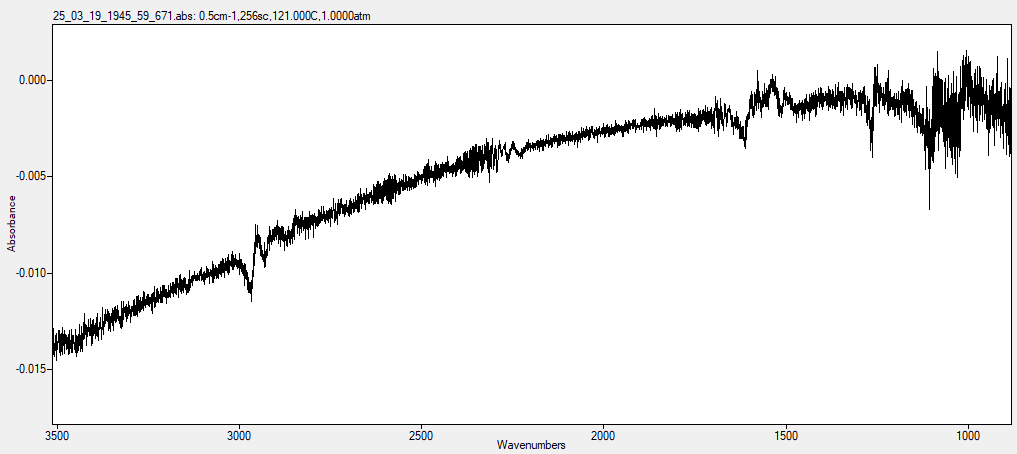  
<br>
<h5 style="text-align: center;"><strong>Fig. 1: 10m Cell Representative Absorbance Spectrum</strong></h5>

</center>

<br>

<center>
  
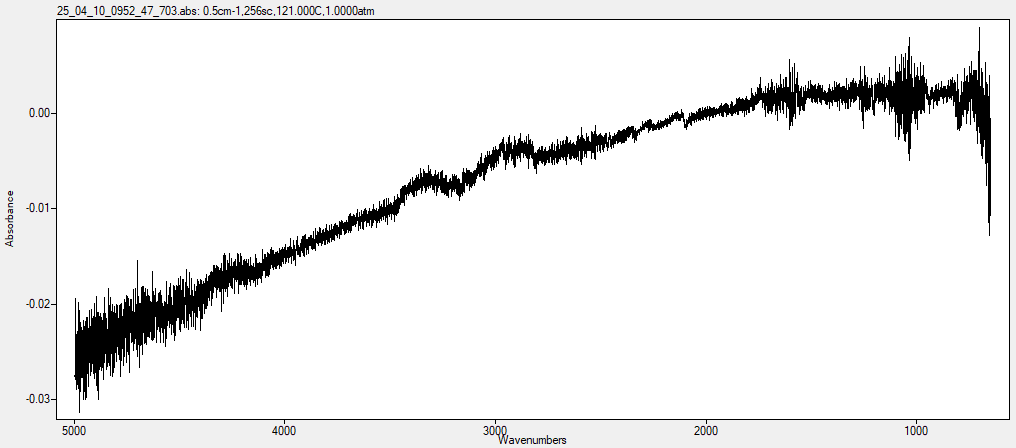  
<br>
<h5 style="text-align: center;"><strong>Fig. 2: Cell Bypass Representative Absorbance Spectrum</strong></h5>

</center>



<br>

_<h3 style="text-align: center;">Analysis</h3>_

<br>

The primary analytical modality will be comparing the _standard deviation_ of the absorbance values for each setup, in each region of interest. The regions of interest are:
1. $1300-1400$: Useful for checking low/mid $cm^{-1}$ behavior - relatively clean
2. $1800-1900$: Typically free from strong sample or atmospheric peaks - often used for baseline assessment
3. $2000-2200$: Standard for baesline noise measurement
4. $2500-2700$: Typically quiet - no major functional groups here
5. $3600-3800$: High frequency region, useful for seeing behavior of noise far from mid-IR

The purpose of selecting multiple regions is to account for wavenumber dependency in noise values. Noise fluctuates with spatial frequency and, this way, we have a comprehensive comparative analysis spanning the entire spectrum (_pun intended_) of spectral frequencies resolvable by our detector.

Standard deviation is used, rather than a comparison of the mean due to the very nature of noise. __Noise__ is random, zero-mean, fluctuations from baseline. Characterized, statistically, _exactly_ by the standard deviation of the absorbance values.

Implemented below is my analytical code:



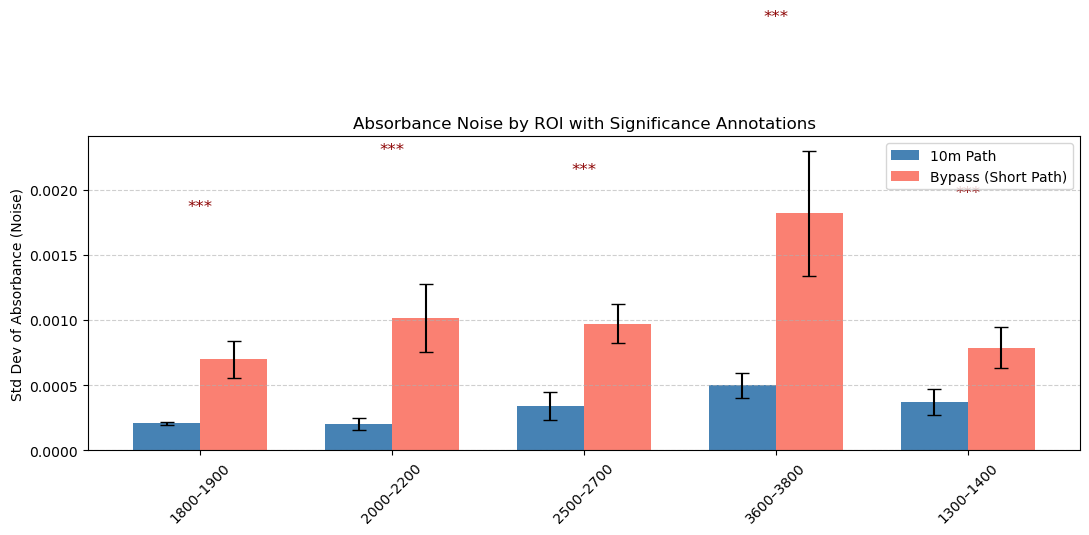

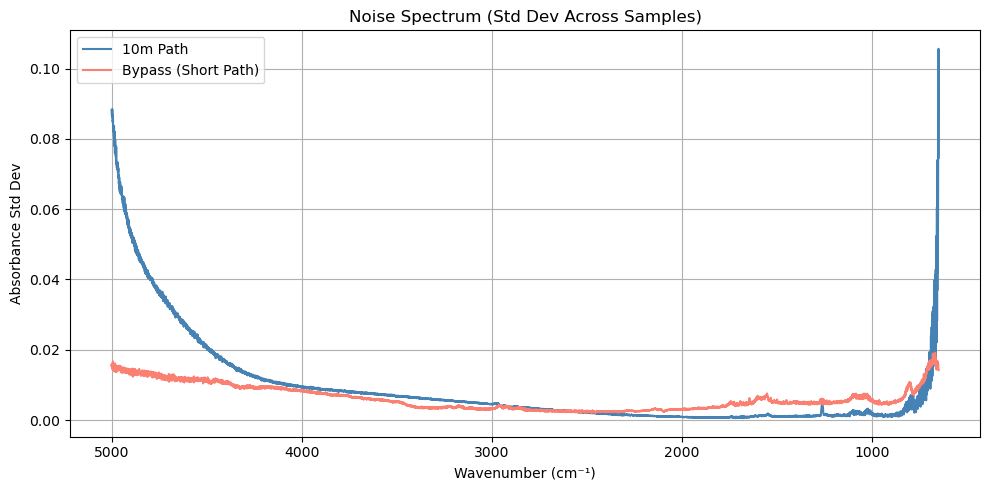


--- ROI Analysis Summary ---

ROI: 1800–1900
  Std Dev (10m)        : 0.000207
  Std Dev (Bypass)     : 0.000700
  % Increase in Noise  : -70.48%
  Coeff. of Variation  :
     - 10m             : 5.35%
     - Bypass          : 20.17%
  p-value              : 0.0000000045

ROI: 2000–2200
  Std Dev (10m)        : 0.000202
  Std Dev (Bypass)     : 0.001016
  % Increase in Noise  : -80.12%
  Coeff. of Variation  :
     - 10m             : 24.06%
     - Bypass          : 25.87%
  p-value              : 0.0000000351

ROI: 2500–2700
  Std Dev (10m)        : 0.000341
  Std Dev (Bypass)     : 0.000972
  % Increase in Noise  : -64.91%
  Coeff. of Variation  :
     - 10m             : 30.96%
     - Bypass          : 15.37%
  p-value              : 0.0000000053

ROI: 3600–3800
  Std Dev (10m)        : 0.000499
  Std Dev (Bypass)     : 0.001821
  % Increase in Noise  : -72.58%
  Coeff. of Variation  :
     - 10m             : 18.75%
     - Bypass          : 26.24%
  p-value              : 0.000000

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import ttest_ind
import glob

# === CONFIGURATION ===

# Define data folders
long_path_folder = r"C:\Users\q\Documents\EFTIR\CSV Files\Long Path"
short_path_folder = r"C:\Users\q\Documents\EFTIR\CSV Files\Short Path"

# Regions of Interest
rois = {
    "1800–1900": (1800, 1900),
    "2000–2200": (2000, 2200),
    "2500–2700": (2500, 2700),
    "3600–3800": (3600, 3800),
    "1300–1400": (1300, 1400)
}

# === FUNCTIONS ===

def load_roi_std_data(folder_path):
    """Return ROI-wise list of std devs for each spectrum in a folder."""
    roi_std = {roi: [] for roi in rois}
    roi_mean = {roi: [] for roi in rois}
    
    for file in os.listdir(folder_path):
        
            df = pd.read_csv(os.path.join(folder_path, file))
                
            df.columns = df.columns.str.strip()
            wn_col = df.columns[0]
            ab_col = df.columns[1]
            
            for roi_name, (low, high) in rois.items():
                roi_data = df[(df[wn_col] >= low) & (df[wn_col] <= high)]
                absorbance = roi_data[ab_col]
                roi_std[roi_name].append(absorbance.std())
                roi_mean[roi_name].append(absorbance.mean())
                
    return roi_std, roi_mean

def compute_stats(roi_std, roi_mean):
    """Compute mean std dev, std dev of std devs, CV%, and mean baseline."""
    roi_stats = {}
    for roi in rois:
        stds = np.array(roi_std[roi])
        means = np.array(roi_mean[roi])
        mean_std = np.mean(stds)
        std_of_std = np.std(stds)
        cv_percent = (std_of_std / mean_std) * 100 if mean_std != 0 else 0
        roi_stats[roi] = {
            'mean_std': mean_std,
            'std_of_std': std_of_std,
            'cv_percent': cv_percent,
            'mean_baseline': np.mean(means)
        }
    return roi_stats

# === LOAD & COMPUTE ===

long_std, long_mean = load_roi_std_data(long_path_folder)
short_std, short_mean = load_roi_std_data(short_path_folder)

long_stats = compute_stats(long_std, long_mean)
short_stats = compute_stats(short_std, short_mean)

# === t-tests and Percent Increase ===

t_results = {}
percent_increase = {}

for roi in rois:
    long_vals = long_std[roi]
    short_vals = short_std[roi]
    t_stat, p_val = ttest_ind(long_vals, short_vals)
    t_results[roi] = p_val
    increase = (np.mean(long_vals) - np.mean(short_vals)) / np.mean(short_vals) * 100
    percent_increase[roi] = increase

# === BAR PLOT with ERROR BARS AND ANNOTATIONS ===

x = np.arange(len(rois))
width = 0.35

long_means = [long_stats[roi]['mean_std'] for roi in rois]
long_errors = [long_stats[roi]['std_of_std'] for roi in rois]

short_means = [short_stats[roi]['mean_std'] for roi in rois]
short_errors = [short_stats[roi]['std_of_std'] for roi in rois]

roi_labels = list(rois.keys())

fig, ax = plt.subplots(figsize=(11, 6))

bars1 = ax.bar(x - width/2, long_means, width, yerr=long_errors,
               capsize=5, label='10m Path', color='steelblue')
bars2 = ax.bar(x + width/2, short_means, width, yerr=short_errors,
               capsize=5, label='Bypass (Short Path)', color='salmon')

# Annotate with stars for significance
for i, roi in enumerate(rois):
    p_val = t_results[roi]
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    if star:
        y = max(long_means[i] + long_errors[i], short_means[i] + short_errors[i]) + 0.001
        ax.text(x[i], y, star, ha='center', fontsize=12, color='darkred')

ax.set_ylabel("Std Dev of Absorbance (Noise)")
ax.set_title("Absorbance Noise by ROI with Significance Annotations")
ax.set_xticks(x)
ax.set_xticklabels(roi_labels, rotation=45)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# === NOISE TRACE PLOT ===

def compute_noise_trace(folder):
    """Returns mean noise spectrum (std dev at each wavenumber)."""
    spectra = []
    for file in glob.glob(os.path.join(folder, "*.csv")):
        df = pd.read_csv(file)
        absorbance = df.iloc[:, 1].values
        spectra.append(absorbance)
    spectra = np.array(spectra)
    noise = np.std(spectra, axis=0)
    wavenumbers = df.iloc[:, 0].values
    return wavenumbers, noise

wn_long, noise_long = compute_noise_trace(long_path_folder)
wn_short, noise_short = compute_noise_trace(short_path_folder)

plt.figure(figsize=(10, 5))
plt.plot(wn_long, noise_long, label='10m Path', color='steelblue')
plt.plot(wn_short, noise_short, label='Bypass (Short Path)', color='salmon')
plt.gca().invert_xaxis()
plt.title("Noise Spectrum (Std Dev Across Samples)")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorbance Std Dev")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === PRINT SUMMARY TABLE ===

print("\n--- ROI Analysis Summary ---")
for roi in rois:
    print(f"\nROI: {roi}")
    print(f"  Std Dev (10m)        : {long_stats[roi]['mean_std']:.6f}")
    print(f"  Std Dev (Bypass)     : {short_stats[roi]['mean_std']:.6f}")
    print(f"  % Increase in Noise  : {percent_increase[roi]:.2f}%")
    print(f"  Coeff. of Variation  :")
    print(f"     - 10m             : {long_stats[roi]['cv_percent']:.2f}%")
    print(f"     - Bypass          : {short_stats[roi]['cv_percent']:.2f}%")
    print(f"  p-value              : {t_results[roi]:.10f}")


_<h3 style="text-align: center;">Conclusions</h3>_

<br>

This study investigated the relationship between optical path length and baseline absorbance noise in an FTIR spectrometer system using a 10-meter gas cell and a bypass configuration. Contrary to conventional expectations, I observed a significant reduction in baseline noise when using the long-path (10 m) cell compared to the short-path (bypass) configuration. Across all selected regions of interest (ROIs), the 10-meter configuration consistently exhibited lower standard deviations of absorbance, with noise reductions ranging from 52.6% to 80.1%, and highly significant statistical differences (p-values < 0.00001 for all ROIs).

This result stands in contrast to the commonly held understanding that longer optical paths tend to increase noise in FTIR absorbance spectra. This expectation is rooted in the fact that longer path lengths decrease transmittance, especially in strongly absorbing regions, which can reduce signal-to-noise ratios due to photon flux limitations and increased detector noise sensitivity at low transmittance levels$^{1,2}$. However, these models primarily describe absorbance noise behavior in regions of strong signal, not in flat baseline regions.


I propose that the unexpected increase in baseline noise observed in the short-path configuration is likely due to unintended optical instability introduced by removing the IR cell. In FTIR systems, sample cells often include focusing mirrors or window elements that help maintain beam collimation and alignment. Their removal may have resulted in beam divergence, optical clipping, or increased scattering, thereby degrading the uniformity of the IR beam and increasing random fluctuations at the detector. This interpretation is supported by elevated coefficients of variation in the bypass configuration, as well as a significantly higher overall baseline noise profile across the IR spectrum.

These findings underscore the importance of considering not just the length of the optical path, but also the role of optical elements such as mirrors, windows, and beam shaping components in maintaining spectral stability. Future studies may further isolate these effects by maintaining cell alignment while modifying path length independently, or by examining interferogram quality to assess beam coherence.

<br>

_<h3 style="text-align: center;">Further Experimental Considerations</h3>_

<br>

1. Measure optical path with nose mirror removed for completeness of data points
2. Conduct experiments in closer temporal proximity to mitigate day-to-day variance
3. Investigate any other confounding factors involved with removing the mirror and having the signal bypass the cell entirely
    1. E.g., the cell windows acting as an aperture and focusing down the IR beam and the feature loss with the removal of the cell windows

<br>

_<h3 style="text-align: center;">References</h3>_

<br>

1. Griffiths, Peter R., and James A. de Haseth. Fourier Transform Infrared Spectrometry. 2nd ed., Wiley-Interscience, 2007.
2. Smith, Brian C. Fundamentals of Fourier Transform Infrared Spectroscopy. 2nd ed., CRC Press, 2011.